In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 파일 불러오기 
df = pd.read_csv('2021_2025_연봉_합본데이터_최종(계약금).csv')
df

,선수,연봉(만원),팀,pid,연도,팀연봉순위,전체연봉순위,계약금(만원),계약금(만원)분할,연봉 총수령액(만원)
0,가빌리오,44980,SSG 랜더스,14896,2021,8,70,0,0,44980
1,강경학,8700,KIA 타이거즈,10676,2021,24,264,0,0,8700
2,강동연,4400,NC 다이노스,10883,2021,44,442,0,0,4400
3,강동호,3500,롯데 자이언츠,12927,2021,45,491,0,0,3500
4,강로한,3700,롯데 자이언츠,11389,2021,43,478,0,0,3700
...,...,...,...,...,...,...,...,...,...,...
4223,김주훈,3000,키움 히어로즈,16129,2025,55,567,0,0,3000
4224,서유신,3000,키움 히어로즈,15483,2025,55,567,0,0,3000
4225,박성빈,3000,키움 히어로즈,15479,2025,55,567,0,0,3000
4226,이우석,1500,키움 히어로즈,11360,2025,78,823,0,0,1500


In [3]:
# 전체 칼럼 
cols = list(df.columns)

# 순서 변경할 칼럼 
change_cols = ['팀연봉순위', '전체연봉순위']

# change_cols 제외 나머지 + move_cols 순으로 재정렬
new_cols = [col for col in cols if col not in change_cols] + change_cols

# 순서 적용
df = df[new_cols]

In [4]:
df

,선수,연봉(만원),팀,pid,연도,계약금(만원),계약금(만원)분할,연봉 총수령액(만원),팀연봉순위,전체연봉순위
0,가빌리오,44980,SSG 랜더스,14896,2021,0,0,44980,8,70
1,강경학,8700,KIA 타이거즈,10676,2021,0,0,8700,24,264
2,강동연,4400,NC 다이노스,10883,2021,0,0,4400,44,442
3,강동호,3500,롯데 자이언츠,12927,2021,0,0,3500,45,491
4,강로한,3700,롯데 자이언츠,11389,2021,0,0,3700,43,478
...,...,...,...,...,...,...,...,...,...,...
4223,김주훈,3000,키움 히어로즈,16129,2025,0,0,3000,55,567
4224,서유신,3000,키움 히어로즈,15483,2025,0,0,3000,55,567
4225,박성빈,3000,키움 히어로즈,15479,2025,0,0,3000,55,567
4226,이우석,1500,키움 히어로즈,11360,2025,0,0,1500,78,823


In [5]:
df['연봉 총수령액(만원)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4228 entries, 0 to 4227
Series name: 연봉 총수령액(만원)
Non-Null Count  Dtype
--------------  -----
4228 non-null   int64
dtypes: int64(1)
memory usage: 33.2 KB


### 연봉 등급 4구간

In [7]:
bins = [0, 5000, 10000, 50000, float('inf')]
labels = ['D', 'C', 'B', 'A']

df['연봉등급'] = pd.cut(df['연봉 총수령액(만원)'], bins=bins, labels=labels, right=False)

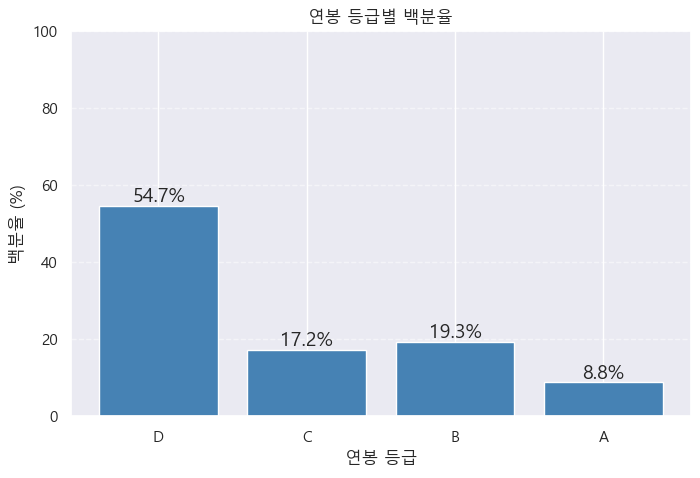

In [11]:
grade_pct = df['연봉등급'].value_counts(normalize=True).reindex(labels, fill_value=0) * 100

plt.figure(figsize=(8, 5))
plt.bar(grade_pct.index, grade_pct.values, color='steelblue')
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('연봉 등급별 백분율')
plt.ylim(0, 100)

for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
# 4. 확인
df= df[['팀', '선수', '연봉 총수령액(만원)', '연봉등급', 'pid', '연도', '팀연봉순위', '전체연봉순위']]
df

,팀,선수,연봉 총수령액(만원),연봉등급,pid,연도,팀연봉순위,전체연봉순위
0,SSG 랜더스,가빌리오,44980,B,14896,2021,8,70
1,KIA 타이거즈,강경학,8700,C,10676,2021,24,264
2,NC 다이노스,강동연,4400,D,10883,2021,44,442
3,롯데 자이언츠,강동호,3500,D,12927,2021,45,491
4,롯데 자이언츠,강로한,3700,D,11389,2021,43,478
...,...,...,...,...,...,...,...,...
4223,키움 히어로즈,김주훈,3000,D,16129,2025,55,567
4224,키움 히어로즈,서유신,3000,D,15483,2025,55,567
4225,키움 히어로즈,박성빈,3000,D,15479,2025,55,567
4226,키움 히어로즈,이우석,1500,D,11360,2025,78,823


In [10]:
10/0

ZeroDivisionError: division by zero

In [ ]:
# 저장 
df.to_csv('2021_2025_연봉_등급(4구간).csv', index=False, encoding='utf-8-sig')